In [1]:
from model_manager import section1, section2, single_model
import optimizer as opt
import dataset_creator

Num GPUs Available:  1


In [2]:
main_folder = '../'
dataset1_folder = main_folder + 'dataset_tfrecord_small' + '/'
dataset2_folder = main_folder + 'dataset2_small' + '/'
checkpoints_sect1 = main_folder + 'checkpoints_sect1' + '/'

In [ ]:
dataset1_generator = dataset_creator.Dataset1()
dataset1_generator = dataset1_generator.generate_dataset(dataset1_folder + 'coords.tfrecord',
                                                         dataset1_folder + 'coords_test.tfrecord',
                                                         dataset1_folder + 'train.tfrecord',
                                                         dataset1_folder + 'test.tfrecord',
                                                         n_images=1280,
                                                         batch_size=32
                                                         )

Iteration: 0/3
Training model with: [128, 32, 8], [32, 64, 128]
[32, 128, 128, 1] [32, 2]
[32, 128, 128, 1] [32, 2]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         2312      
      

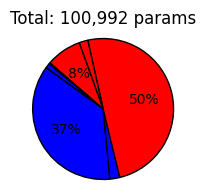

Epoch 20/120 - loss: 14.1932 - mean_absolute_error: 2.6531 - val_loss: 13.8828 - val_mean_absolute_error: 2.7303415
Target MAE of 3 reached! Stopping training.

Training time: 57.8s
The history has the following data:  dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


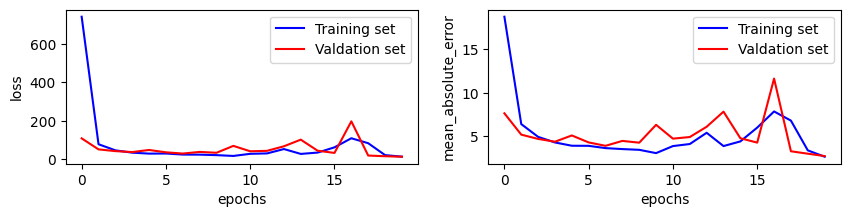

Iteration: 1/3
Training model with: [102, 25, 6], [25, 51, 102]
[32, 128, 128, 1] [32, 2]
[32, 128, 128, 1] [32, 2]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 102)     1020      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 102)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 25)        22975     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 25)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         1356      
      

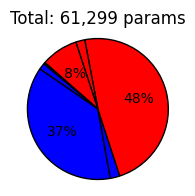

Epoch 33/120 - loss: 13.4771 - mean_absolute_error: 2.6059 - val_loss: 17.2416 - val_mean_absolute_error: 2.9754972
Target MAE of 3 reached! Stopping training.

Training time: 76.3s
The history has the following data:  dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


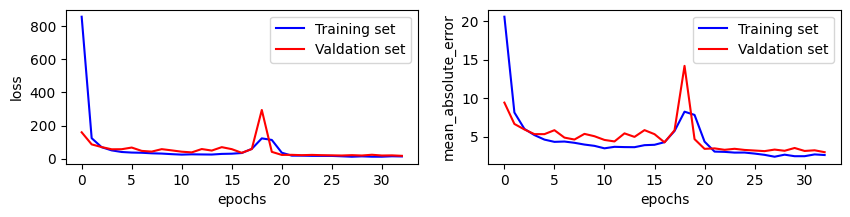

Iteration: 2/3
Training model with: [81, 20, 4], [20, 40, 81]
[32, 128, 128, 1] [32, 2]
[32, 128, 128, 1] [32, 2]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 81)      810       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 81)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 20)        14600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 4)         724       
        

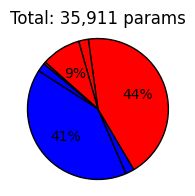

Epoch 38/120 - loss: 14.8095 - mean_absolute_error: 2.7527 - val_loss: 17.1019 - val_mean_absolute_error: 2.97645085
Target MAE of 3 reached! Stopping training.

Training time: 71.0s
The history has the following data:  dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


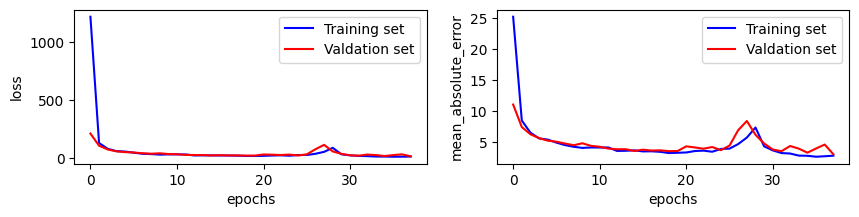

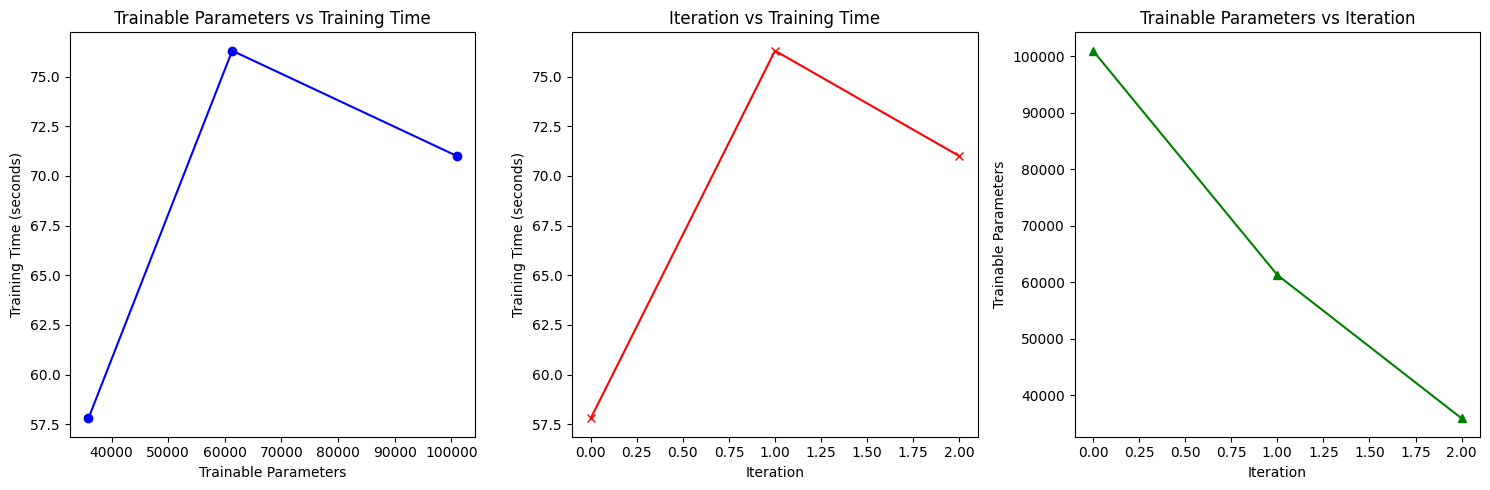

In [3]:
conv_layers = [128,32,8]
dense_layers = [32,64,128]
target = 3
model = section1()
optimizer = opt.Optimizer()
best_conv, best_dense, iter_num = optimizer.optimize(model, conv_layers, dense_layers, target, max_iter=3, max_failed_trains=2)

In [ ]:
#print(best_conv, best_dense)
best_conv = [64, 16, 3] 
best_dense = [16, 32, 64]

In [ ]:
dataset2_gen = dataset_creator.Dataset2(weights=checkpoints_sect1 + 'model_optimize_3.weights.h5', conv_layers=best_conv, dense_layers=best_dense)
dataset2_gen.generate_dataset(dataset1_folder + 'train.tfrecord',
                              dataset1_folder + 'test.tfrecord',
                              dataset2_folder + 'train_cropped.tfrecord',
                              dataset2_folder + 'test_cropped.tfrecord',
                              batch_size=32
                              )

Iteration: 0/3
Training model with: [128, 32, 8], [32, 64, 128]
[32, 42, 42, 1] [32, 10]
[32, 42, 42, 1] [32, 10]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           2312      
        

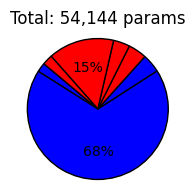

Epoch 120/120 - loss: 0.0605 - accuracy: 0.9898 - val_loss: 1.8360 - val_accuracy: 0.7625
Training time: 53.7s
The history has the following data:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


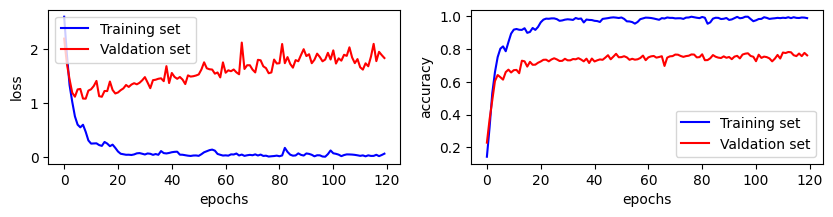

Target value not reached, attempt: 1
Iteration: 1/3
Training model with: [102, 25, 6], [25, 51, 102]
[32, 42, 42, 1] [32, 10]
[32, 42, 42, 1] [32, 10]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 102)       1020      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 102)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 25)        22975     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 25)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7

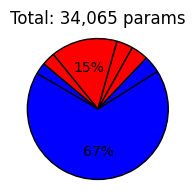

Epoch 120/120 - loss: 0.0551 - accuracy: 0.9812 - val_loss: 2.5821 - val_accuracy: 0.6852
Training time: 46.0s
The history has the following data:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


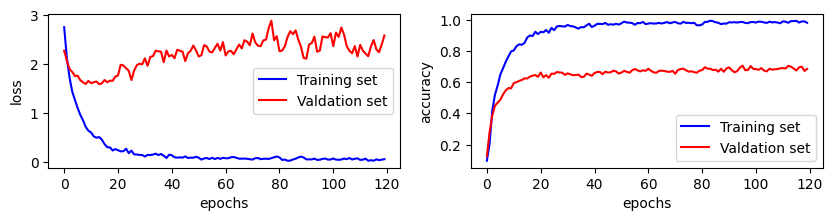

Target value not reached, attempt: 2
Target value not reached, done optimizing


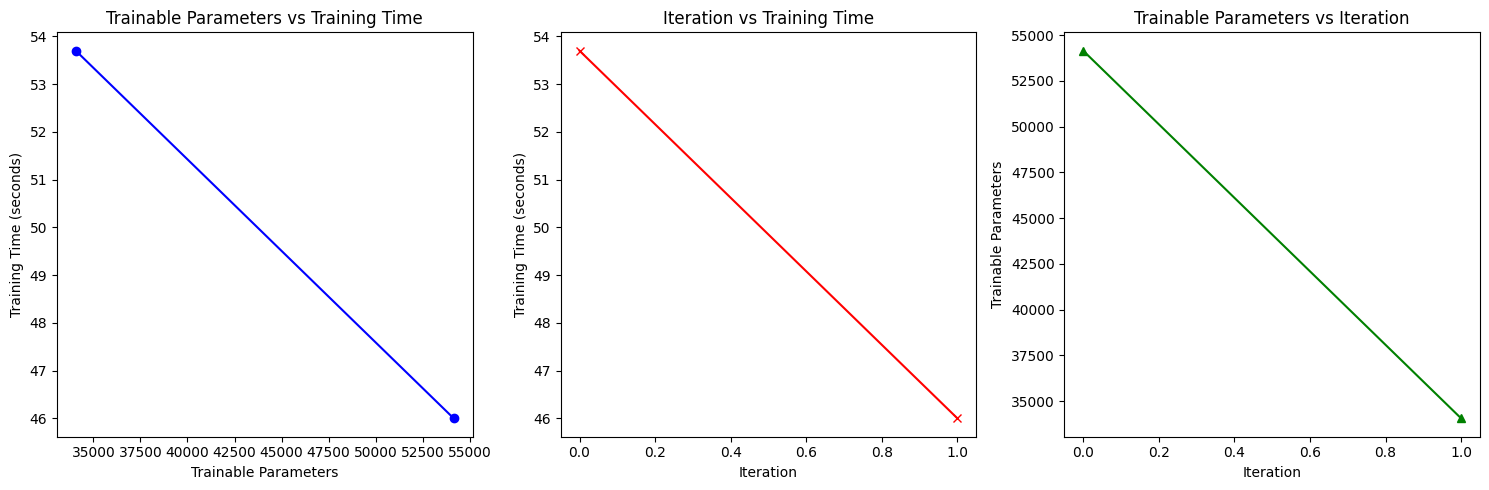

In [4]:
dataset_folder = 'dataset2_small'
train_dataset_name='train_cropped.tfrecord'
val_dataset_name='test_cropped.tfrecord'
conv_layers = [128,32,8]
dense_layers = [32,64,128]
target = 0.8
model = section2()
optimizer = opt.Optimizer()
best_conv, best_dense, iter_num = optimizer.optimize(model, conv_layers, dense_layers, target, max_iter=3)

Iteration: 0/3
Training model with: [128, 32, 8], [32, 64, 128]
[32, 128, 128, 1] [32, 2] [32, 10]
[32, 128, 128, 1] [32, 2] [32, 10]


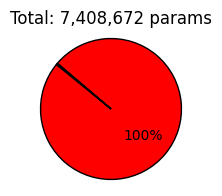

Epoch 120/120 - loss: 0.0000 - accuracy: 1.0000 - val_loss: 10.9884 - val_accuracy: 0.1500
Training time: 162.2s
The history has the following data:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


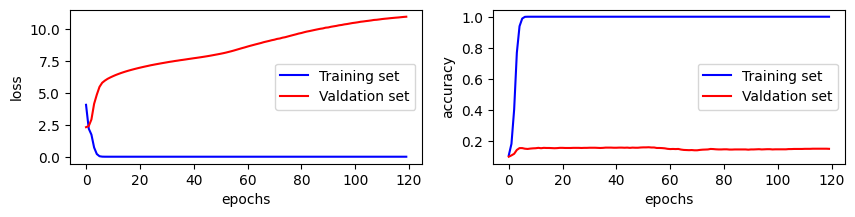

Target value not reached, attempt: 1
Iteration: 1/3
Training model with: [102, 25, 6], [25, 51, 102]
[32, 128, 128, 1] [32, 2] [32, 10]
[32, 128, 128, 1] [32, 2] [32, 10]


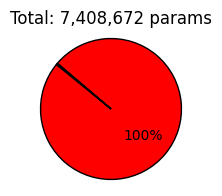

Epoch 104/120 - loss: 0.0000 - accuracy: 1.0000 - val_loss: 9.9686 - val_accuracy: 0.1375

In [ ]:
conv_layers = [128,32,8]
dense_layers = [32,64,128]
target = 0.5
model = single_model()
optimizer = opt.Optimizer()
best_conv, best_dense, iter_num = optimizer.optimize(model, conv_layers, dense_layers, target, max_iter=3, max_failed_trains=2)